In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!Is "/content/drive/My Drive/Colab Notebooks"
inputfile = '/content/drive/My Drive/Colab Notebooks/test_batch'
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/circles500.csv')
buf=open(inputfile, "rb")
from scipy.misc import imsave
import numpy as np
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plimg
from PIL import Image
import pickle


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: Is: command not found


In [0]:
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
random.seed(0)
import csv          
#reference http://www.youtube.com/watch?v=aVId8KMsdUU&feature=BFa&list=LLldMCkmXl4j9_v0HeKdNcRA
# https://blog.csdn.net/u012722531/article/details/80026566 
#this is the neural network calss I defined for fitting the image data to classify frogs and dogs
class neural_network:
    result1=[]
    #initialize all parameters that in should be set on the nureal network 
    def __init__(self,input_vector,input_size,hidden_nodes,learning_rate,label):
        weight=[]
        bias=[]
        #input data
        self.input_vector=input_vector
        #input size
        self.input_size=input_size
        #nodes on hidden layer
        self.hidden_nodes=hidden_nodes
        #learning rate
        self.learning_rate=learning_rate
        #label on the training data
        self.label=label
        size=([input_size,hidden_nodes,hidden_nodes,1])
        #https://blog.csdn.net/leo_sheng/article/details/80741789  how to use random.uniform( ) 
        #this is initialization for weights and bias, using random.uniform to get the inital weigts and bias 
        #for all layers from range -1 to 1.
        for l1,l2 in zip(size[:-1],size[1:]):
            w=np.zeros((l1,l2), dtype=float, order='C')
            for i in range(l1):
                for j in range(l2):
                    w[i][j]=random.uniform(-1.0, 1.0)
            weight.append(w)
        for y in size[1:]:
            b=np.zeros((y,1), dtype=float, order='C')
            for i in range(b.shape[0]): 
                b[i]=random.uniform(-1.0, 1.0) 
            bias.append(b)
        #weights of all layers
        self.weight=weight
        #bia of all layers
        self.bias=bias 
    #sigmoid function through using the formual of sigmoid
    #reference:https://blog.csdn.net/tyhj_sf/article/details/79932893
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    # derivate of sigmoid function: z represent sigmoid(x), after execute the 
    # feed forward function , the x vlaue already become sigmoid(x), so here using
    # z*z(1-z)only, which means sigmoid(x)*(1-sigmoid(x))
    def derivative_sigmoid(self, z):
        return z*(1-z)

    # the feed forward is caculate the initial output using the function of h=x*w+b
    # a=sigmoid(h), using result list add all output of each layer in case of next step to 
    # update the weights.
    def feed_forward(self,input_vector):
        results=[]
        results.append(input_vector)
        for w,b in zip(self.weight,self.bias):
            input_vector=self.sigmoid(np.dot(input_vector,w)+b.T)
            results.append(input_vector)
        return results
   #back_propagattion used for updating all layer's weights, here using the formula on the class
    def back_prop(self,input_vector,y):
        for iteration in range(1):
          #firstly get the output from the network used for update the previous layer's weight
            output_result=self.feed_forward(input_vector)
            #the error only used real value-predicted value
            error=y-output_result[-1]
            ##output layer
            #using the formula form lecture, derivation_sigmoid(ao)*error
            delta=self.derivative_sigmoid(output_result[-1])*error 
            #using output_result * delta
            adjustment = np.dot(output_result[-1-1].T,delta)
            #using weight+=adjustment*lr
            self.weight[-1]=self.weight[-1]+adjustment*self.learning_rate
            #updata weights from hidden layer using the last updated weights,
            #here for loop depends on how many hidden layers you have, always 
            #update the weights and bias from by behind one layers weight
            for l in range(2,4):
                z = output_result[-l]
                # here get derivative of previous layers output value f'(zj)
                sp = self.derivative_sigmoid(z)
                # using function  f'(zj) · Σk Wj,k 
                delta = np.dot(delta,self.weight[-l+1].T) * sp
                #using function ∆j = f'(zj) · Σk Wj,k ∆k 
                adjustment = np.dot(output_result[-l-1].T,delta)
                #using the function Wi.j ← Wi,j + ai ∆j
                self.weight[-l]=self.weight[-l]+adjustment*self.learning_rate
        return error
    # the fit function is used for pass the parameter to back-pro and print the loss value
    def fit(self):
        for k in range(1000):
            for i in range(len(self.input_vector)):
                feature_vector=np.array([self.input_vector[i]])
                label_vector=np.array([self.label[i]])
                error=self.back_prop(feature_vector,label_vector)
            if k % 50==0:
                print('loss:',error)

       

In [0]:
# 单层
from sklearn.model_selection import train_test_split
def classification_prediction(x):
    predict_label=[]
    for i in x:
        #if value is bigger then 0.5 then is dog. if it is 6 then is frog
        if i[0] >0.5:
           predict_label.append(1)
        elif i[0]<0.5:
             predict_label.append(0)
          
    return predict_label  
def accuracy_test(a,b):
    right = []
    for i in range(len(a)):
        if a[i]==b[i]:
           right.append(1)
    accuracy = len(right)/len(a)
    return accuracy  
  # onvert the array to a float vector of 1024
def convert_to_1024_vector(a):
    list_1024 = []
    #get the first color 
    for j in range(len(a[1])):
        for i in range(len(a[1][j])):
          #convert it into a float vector of 1024
            list_1024.append(a[1][j][i]/255.0)
            
    return list_1024
#use unpickle to get the dataset of image
# referenfe: https://www.cnblogs.com/hans209/p/6919851.html
def unpickle(file):
    train_x=[]
    train_y=[]
    with open(file, 'rb') as fo:
        datadict = pickle.load(fo, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        #get only one color     
        for i in range(len(Y)):
          # get image which label is 5 06 6(dog and frog)
            if  np.any(Y[i] ==5) or np.any(Y[i]==6):
                train_set_x_1024 =convert_to_1024_vector(X[i])
                if Y[i] == 5:
                    train_y.append(1)
                elif  Y[i] == 6:
                    train_y.append(0)
                train_x.append(train_set_x_1024)
    data_x = np.array(train_x)
    data_y = np.array(train_y)
    X_train, X_test, y_train, y_test = train_test_split(data_x[1:5], data_y[1:5], test_size=0.4,random_state=0)
    print(len(X_train))
    ne=neural_network(X_train,1024,6,0.1,y_train)
    ne.fit()
    pe=[]
    correct=0
    for i in range(len(X_test)):
        pre=ne.feed_forward(X_test[i])
        print("21111111111",pre[-1])
        if pre[-1]>0.5:
            pe.append(1)
        else:
            pe.append(0)
    for i in range(len(pe)):
        print(y_test[i])
        if float(pe[i])==y_test[i]:
            correct=correct+1
    accuracy=correct/float(len(pe))
    
    predict_simple_label = classification_prediction(prediction_simple)
    cc = accuracy_test(predict_simple_label,y_train)
    print("##############",cc)
    # referenfe: https://www.cnblogs.com/hans209/p/6919851.html
test_data = unpickle("/content/drive/My Drive/Colab Notebooks/test_batch")
load_CIFAR_Labels=unpickle("/content/drive/My Drive/Colab Notebooks/data_batch_1")
def load_CIFAR_Labels(filename):
    with open(filename, 'rb') as f:
        lines = [x for x in f.readlines()]
if __name__ == "__main__":
    load_CIFAR_Labels("/content/drive/My Drive/Colab Notebooks/batches.meta")
    

In [0]:
#get dataset 
# referenfe: https://www.cnblogs.com/hans209/p/6919851.html
def unpickle(file):
    with open(file, 'rb')as f:
#        datadict = p.load(f)
        datadict = p.load(f,encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        Y = np.array(Y)
        return  X, Y
# onvert the array to a float vector of 1024
def convert_to_1024_vector(a):
    
    list_1024 = []
    for j in range(len(a[0])):
        for i in range(len(a[j])):
            list_1024.append(a[j][i]/255.0)
    return list_1024
def load_CIFAR_Labels(filename):
    with open(filename, 'rb') as f:
        lines = [x for x in f.readlines()]
def image_to_vector(imgX,imgY):
    X=[]
    Y=[]
    for i in range(imgX.shape[0]):
        if  np.any(imgY[i] ==5) or np.any(imgY[i]==6):
            imgs = imgX[i]
            label = imgY[i]
        # get three versions from dataset                
        # from data to image
            color_0 = Image.fromarray(imgs[0])
            color_1 = Image.fromarray(imgs[1])
            color_2 = Image.fromarray(imgs[2])
            #merge three colors togather, then use convert to make it gray
            # fererence: https://vimsky.com/article/3729.html
            img = Image.merge("RGB", (color_0, color_1, color_2)).convert("L")
            # call "convert_to_1024_vector" to convert array into a 1024 float vector
            image_vector_1024 = convert_to_1024_vector(np.array(img))
            X.append(image_vector_1024)
            if imgY[i]==5:
               Y.append(1)
            elif imgY[i]==6:
                 Y.append(0)
          
    X=np.array(X)
    Y=np.array(Y)
    return X,Y
 # 
def classification_prediction(x):
    predict_label=[]
    for i in x:
        
        if i[0] >0.5:
           predict_label.append(1)
        elif i[0]<0.5:
             predict_label.append(0)
          
    return predict_label
  
def accuracy_test(a,b):
    right = []
    for i in range(len(a)):
        if a[i]==b[i]:
           right.append(1)
    accuracy = len(right)/len(a)
    return accuracy
  
if __name__ == "__main__":
    load_CIFAR_Labels("/content/drive/My Drive/Colab Notebooks/batches.meta")
    test_imgX, test_imgY = unpickle("/content/drive/My Drive/Colab Notebooks/test_batch")
    train_imgX, train_imgY= unpickle("/content/drive/My Drive/Colab Notebooks/data_batch_1")
    #here I using all data to testing for all traing data from data_batch_1, tseting data from test_batch
    X_train=train_batch_data[0]
    y_train=train_batch_data[1]
    X_test=test_batch_data[0]
    y_test=test_batch_data[1]
#     still can using sample to random select data
#     X_train=random.sample(list(train_batch_data[0]),1500) 
#     y_train=random.sample(list(train_batch_data[1]),1500) 
#     X_test=random.sample(list(test_batch_data[0]),400) 
#     y_test=random.sample(list(test_batch_data[1]),400)
    #this is for data training, the input data, input size, hidden layer size and learning rate and label.
    ne=neural_network(X_train,1024,50,0.05,y_train)
    ne.fit()
    pe=[]
    correct=0
    #get the accuracy, if it's correct, then total correct number +1,using 
    #correct number/total
    for i in range(len(X_test)):
        pre=ne.feed_forward(X_test[i])
        if pre[-1]>0.5:
            pe.append(1)
        else:
            pe.append(0)
    for i in range(len(pe)):
        if float(pe[i])==y_test[i]:
            correct=correct+1
    accuracy=correct/float(len(pe))
    print("the accuracy of two hidden layers",accuracy)
    
    
    
    
    
  

loss: [[0.76117248]]
loss: [[0.76737829]]
loss: [[0.1120672]]
loss: [[0.03559981]]
loss: [[0.00200097]]
loss: [[7.45596717e-05]]
loss: [[0.00011762]]
loss: [[5.2593559e-05]]
loss: [[3.91342419e-05]]
loss: [[3.09615144e-05]]
loss: [[2.36710515e-05]]
loss: [[1.06073747e-05]]
loss: [[6.56022268e-06]]
loss: [[4.10796285e-06]]
loss: [[3.10564055e-06]]
loss: [[2.34511264e-06]]
loss: [[4.5870369e-06]]
loss: [[2.41049756e-06]]
loss: [[1.84268828e-06]]
loss: [[1.55828602e-06]]
the accuracy of two hidden layers 0.7015


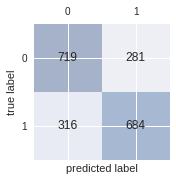

Precision: 0.709
Recall: 0.684
F1: 0.696


In [0]:
import matplotlib.pyplot as plt
#from the confusionmatricx we can see how many should be positive and we predict to positive and negitive
#how many should be negitive and we predict it to negative
def  confusion_matricx(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in range(len(y_true)):
        if y_true[x] == 0 and y_pred[x] == 0:
            TN += 1
        if y_true[x] == 0 and y_pred[x] == 1:
            FP += 1
        if y_true[x] == 1 and y_pred[x] == 1:
            TP += 1
        if y_true[x] == 1 and y_pred[x] == 0:
            FN += 1
    cm = [[TN, FP],[FN, TP]]
    cm=np.array(cm)
    return cm
comfuse = confusion_matricx(y_test,pe)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(comfuse, cmap=plt.cm.Blues, alpha=0.3)
for i in range(comfuse.shape[0]):
    for j in range(comfuse.shape[1]):
        ax.text(x=j, y=i, s=comfuse[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

def precision_score1(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in range(len(y_true)):
        if y_true[x] == 0 and y_pred[x] == 0:
            TN += 1
        if y_true[x] == 0 and y_pred[x] == 1:
            FP += 1
        if y_true[x] == 1 and y_pred[x] == 1:
            TP += 1
        if y_true[x] == 1 and y_pred[x] == 0:
            FN += 1
        x += 1
    p=TP/float((TP+FP))
    return p
  
print('Precision: %.3f' % precision_score1(y_true=y_test, y_pred=pe))

def recall_score(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in range(len(y_true)):
        if y_true[x] == 0 and y_pred[x] == 0:
            TN += 1
        if y_true[x] == 0 and y_pred[x] == 1:
            FP += 1
        if y_true[x] == 1 and y_pred[x] == 1:
            TP += 1
        if y_true[x] == 1 and y_pred[x] == 0:
            FN += 1
        x += 1
    p=TP/float((TP+FN))
    return p 
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=pe))

#the F1 value is the harmonic mean of the precision rate and the recall rate
def F1_score(y_true, y_pred):
    P=precision_score1(y_true, y_pred)
    R=recall_score(y_true, y_pred)
    F=2*P*R/float(P+R)
    return F
print('F1: %.3f' % F1_score(y_true=y_test, y_pred=pe))